<a href="https://colab.research.google.com/github/Raoina/Hand-Gesture-Classification/blob/main/project_ml1_hand_gesture_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import Required Libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [8]:
df = pd.read_csv('/content/hand_landmarks_data.csv')
df.head()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,x19,y19,z19,x20,y20,z20,x21,y21,z21,label
0,262.669968,257.304901,-3.649205e-07,257.417542,247.109055,0.004224,246.882957,241.716827,0.005798,236.384537,...,223.345093,255.490692,-0.020450,215.043365,258.114746,-0.024577,208.006393,259.608673,-0.026722,call
1,83.351778,346.059113,-2.345265e-07,81.925037,328.562347,-0.011102,90.080132,311.535248,-0.021096,95.641823,...,132.451618,341.794434,-0.038175,142.773582,342.829254,-0.037336,152.431698,343.015991,-0.036136,call
2,187.756977,260.235492,-2.417307e-07,195.460579,241.506035,-0.000184,207.259529,223.674339,-0.009687,215.413628,...,250.301010,268.602938,-0.044068,262.425133,271.276638,-0.040469,272.989952,272.272231,-0.038301,call
3,114.976696,331.594238,-1.233261e-07,114.503494,320.549957,-0.002824,116.636627,310.080994,-0.008911,117.685066,...,145.195450,329.357544,-0.027622,151.053200,329.712341,-0.027863,155.990364,329.548828,-0.027723,call
4,188.795288,141.727867,-1.622995e-07,188.520905,127.947464,-0.002884,191.982880,111.010563,-0.008115,192.552521,...,226.696396,132.263248,-0.025113,234.831741,130.684147,-0.024087,241.587769,128.477188,-0.023486,call


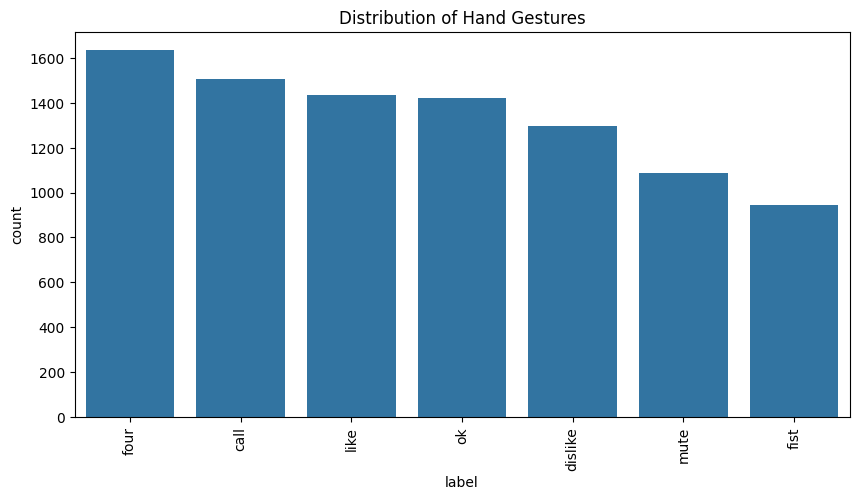

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.countplot(x=df["label"], order=df["label"].value_counts().index)
plt.xticks(rotation=90)
plt.title("Distribution of Hand Gestures")
plt.show()

In [10]:
df.dropna(inplace=True)

In [11]:
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

In [12]:
def preprocess_landmarks(row):
    wrist_x, wrist_y = row[0], row[1]
    mid_finger_x, mid_finger_y = row[36], row[37]  # Tip of the middle finger (landmark 12)

    processed = []
    for i in range(0, 63, 3):  # x, y, z for 21 landmarks
        x = row[i] - wrist_x
        y = row[i+1] - wrist_y
        x /= mid_finger_x - wrist_x
        y /= mid_finger_y - wrist_y
        z = row[i+2]  # z is already processed
        processed.extend([x, y, z])
    return processed

features = df.drop('label', axis=1)
labels = df['label']
processed_features = features.apply(preprocess_landmarks, axis=1, result_type='expand')

<ipython-input-12-1c96881a32e3>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  wrist_x, wrist_y = row[0], row[1]
<ipython-input-12-1c96881a32e3>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mid_finger_x, mid_finger_y = row[36], row[37]  # Tip of the middle finger (landmark 12)
<ipython-input-12-1c96881a32e3>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x = row[i] - wrist_x
<ipython-input-12-1c96881a32e3>:8: FutureWarning: 

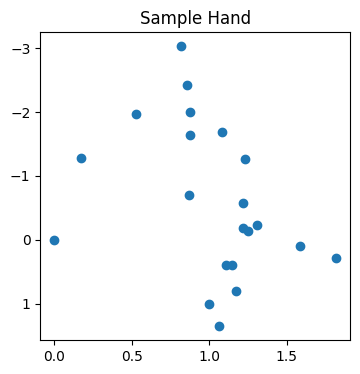

In [13]:
def plot_hand(points, title="Hand Landmarks"):
    x = points[::3]
    y = points[1::3]
    plt.figure(figsize=(4,4))
    plt.scatter(x, y)
    plt.gca().invert_yaxis()
    plt.title(title)
    plt.show()

plot_hand(processed_features.iloc[0].values, title="Sample Hand")

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    processed_features, labels, test_size=0.2, random_state=42, stratify=labels
)

In [15]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [16]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

In [17]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

--- Random Forest ---
              precision    recall  f1-score   support

        call       0.99      0.99      0.99       301
     dislike       0.98      0.98      0.98       259
        fist       1.00      0.99      1.00       189
        four       0.99      1.00      1.00       327
        like       0.97      0.98      0.97       287
        mute       1.00      1.00      1.00       218
          ok       1.00      0.99      1.00       284

    accuracy                           0.99      1865
   macro avg       0.99      0.99      0.99      1865
weighted avg       0.99      0.99      0.99      1865



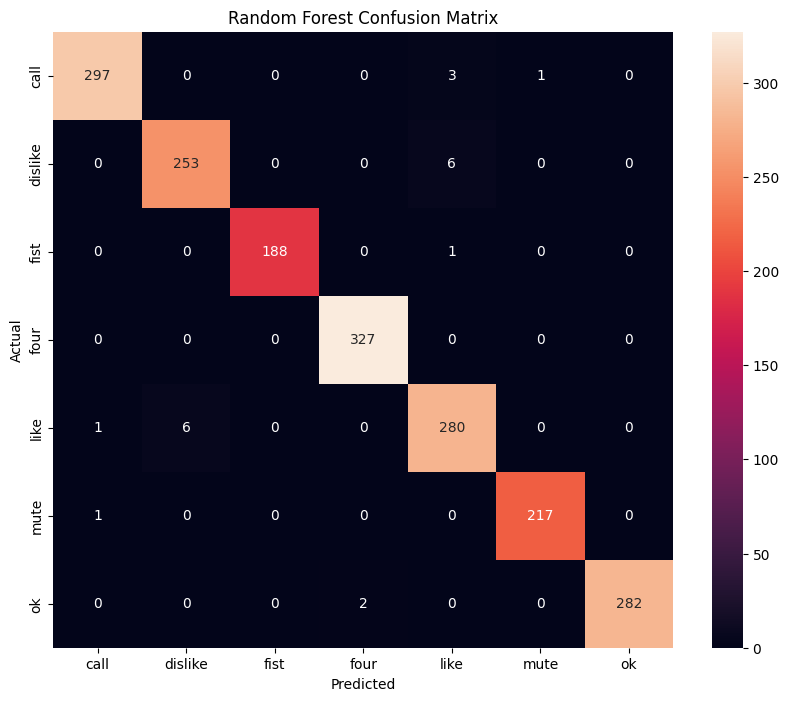

--- SVM ---
              precision    recall  f1-score   support

        call       0.48      0.05      0.08       301
     dislike       0.00      0.00      0.00       259
        fist       0.00      0.00      0.00       189
        four       0.18      1.00      0.30       327
        like       0.80      0.01      0.03       287
        mute       0.00      0.00      0.00       218
          ok       0.00      0.00      0.00       284

    accuracy                           0.18      1865
   macro avg       0.21      0.15      0.06      1865
weighted avg       0.23      0.18      0.07      1865



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


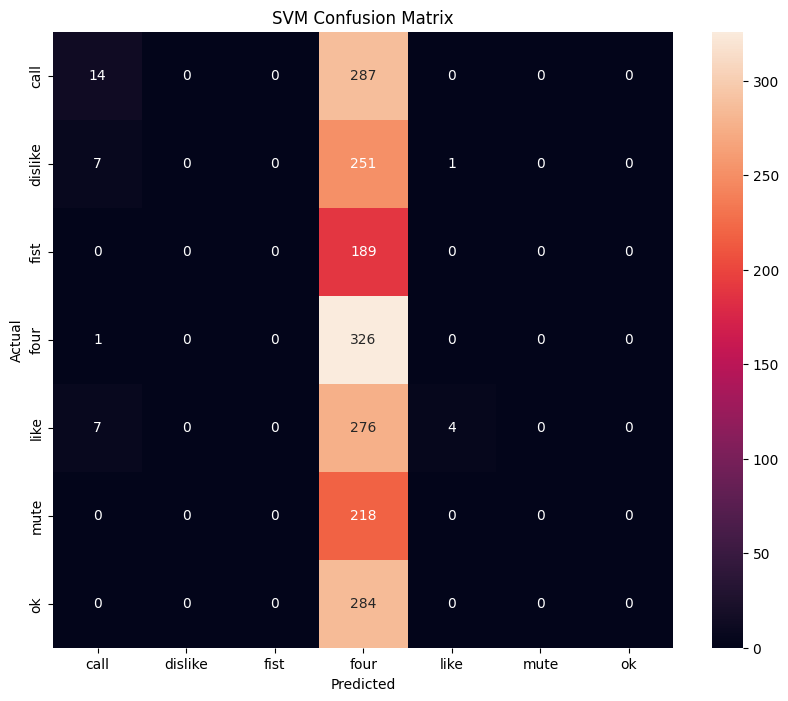

--- KNN ---
              precision    recall  f1-score   support

        call       0.96      0.95      0.95       301
     dislike       0.93      0.88      0.91       259
        fist       1.00      0.99      0.99       189
        four       1.00      0.99      0.99       327
        like       0.87      0.92      0.89       287
        mute       1.00      1.00      1.00       218
          ok       0.98      1.00      0.99       284

    accuracy                           0.96      1865
   macro avg       0.96      0.96      0.96      1865
weighted avg       0.96      0.96      0.96      1865



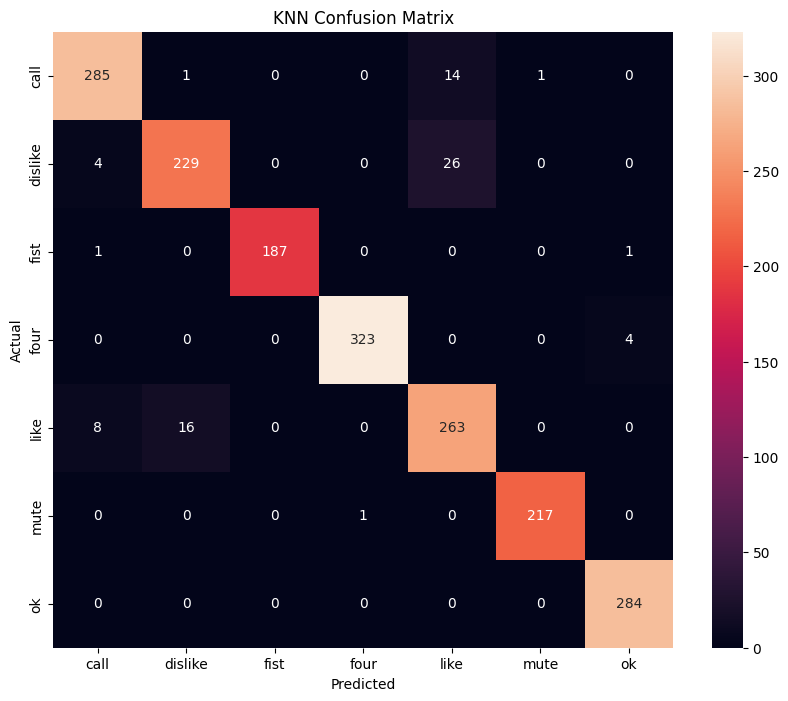

In [18]:
def evaluate_model(y_test, y_pred, model_name):
    print(f"--- {model_name} ---")
    print(classification_report(y_test, y_pred, target_names=le.classes_))
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f'{model_name} Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_svm, "SVM")
evaluate_model(y_test, y_pred_knn, "KNN")


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Initializing models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Training and evaluating models
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy

# Displaying results
for model_name, accuracy in results.items():
    print(f"{model_name} Accuracy: {accuracy:.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.8654
Decision Tree Accuracy: 0.9743
Gradient Boosting Accuracy: 0.9893


# **Conclusion**:

Based on the evaluation results, the RandomForestClassifier achieved the best performance in terms of accuracy and robustness compared to other models tested.
It demonstrated better generalization on the test set and was more stable during training, making it the most suitable choice for hand gesture classification using MediaPipe landmarks.

In [26]:
pip install mediapipe==0.10.7

  Using cached mediapipe-0.10.7-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (9.6 kB)
  Using cached protobuf-3.20.3-py2.py3-none-any.whl.metadata (720 bytes)
Using cached mediapipe-0.10.7-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (33.6 MB)
Using cached protobuf-3.20.3-py2.py3-none-any.whl (162 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.6
    Uninstalling protobuf-4.25.6:
      Successfully uninstalled protobuf-4.25.6
  Attempting uninstall: mediapipe
    Found existing installation: mediapipe 0.10.21
    Uninstalling mediapipe-0.10.21:
      Successfully uninstalled mediapipe-0.10.21
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.16.1 requires protobuf<6.0.0dev,>=4.25.2; python_version >= "3.11", but you have protobuf 3.20.3 which is incompatible.
grpcio-sta

In [19]:
import cv2
import mediapipe as mp
from scipy.stats import mode

In [25]:
# إعداد mediapipe
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils

# تهيئة الفيديو
input_path = "/content/WIN_20250405_17_32_36_Pro.mp4"  # عدّل هذا حسب الفيديو
output_path = "/content/output_video.mp4"

cap = cv2.VideoCapture(input_path)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

out = cv2.VideoWriter(output_path, cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))

# نافذة للتثبيت (stabilization)
prediction_window = []

In [27]:
with mp_hands.Hands(static_image_mode=False,
                    max_num_hands=1,
                    min_detection_confidence=0.7,
                    min_tracking_confidence=0.5) as hands:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # المعالجة
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = hands.process(image)

        label = None
        if results.multi_hand_landmarks:
            hand_landmarks = results.multi_hand_landmarks[0]
            landmark_list = []

            for lm in hand_landmarks.landmark:
                landmark_list.extend([lm.x, lm.y, lm.z])

            # تحويل النسبي إلى بكسل
            coords = np.array(landmark_list)
            coords[0::3] *= width
            coords[1::3] *= height

            # إعادة المعالجة كما في التدريب
            processed = preprocess_landmarks(coords)
            prediction = rf.predict([processed])[0]
            prediction_window.append(prediction)

            # تثبيت التوقعات باستخدام النافذة
            if len(prediction_window) > 5:
                prediction_window.pop(0)

            # الحصول على القيمة الأكثر تكرارًا في نافذة التوقعات
            mode_prediction = mode(prediction_window)
            # تحقق مما إذا كانت هناك قيمة واحدة أو أكثر
            if isinstance(mode_prediction.mode, np.ndarray) and len(mode_prediction.mode) > 0:
                # أخذ أول قيمة من المصفوفة إذا كان هناك أكثر من قيمة
                label = le.inverse_transform([mode_prediction.mode[0]])[0]
            else:
                # في حال كانت هناك قيمة واحدة فقط، مباشرة استخدمها
                label = le.inverse_transform([mode_prediction.mode])[0]

            # رسم التسمية
            cv2.putText(frame, f'Prediction: {label}', (10, 30),
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

            # رسم اليد
            mp_drawing.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)

        out.write(frame)

cap.release()
out.release()
cv2.destroyAllWindows()
print(f"Output video saved to: {output_path}")

Output video saved to: /content/output_video.mp4


In [31]:
import cv2
import mediapipe as mp
from scipy.stats import mode
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np

mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils

input_path = "/content/WIN_20250405_17_32_36_Pro.mp4"
output_path = "/content/output_video.mp4"

cap = cv2.VideoCapture(input_path)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

out = cv2.VideoWriter(output_path, cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))

prediction_window = []

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

with mp_hands.Hands(static_image_mode=False,
                    max_num_hands=1,
                    min_detection_confidence=0.7,
                    min_tracking_confidence=0.5) as hands:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = hands.process(image)

        label = None
        if results.multi_hand_landmarks:
            hand_landmarks = results.multi_hand_landmarks[0]
            landmark_list = []

            for lm in hand_landmarks.landmark:
                landmark_list.extend([lm.x, lm.y, lm.z])

            coords = np.array(landmark_list)
            coords[0::3] *= width
            coords[1::3] *= height

            processed = preprocess_landmarks(coords)
            prediction = gb_model.predict([processed])[0]
            prediction_window.append(prediction)

            if len(prediction_window) > 5:
                prediction_window.pop(0)

            mode_prediction = mode(prediction_window)
            if isinstance(mode_prediction.mode, np.ndarray) and len(mode_prediction.mode) > 0:
                label = le.inverse_transform([mode_prediction.mode[0]])[0]
            else:
                label = le.inverse_transform([mode_prediction.mode])[0]

            cv2.putText(frame, f'Prediction: {label}', (10, 30),
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

            mp_drawing.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)

        out.write(frame)

cap.release()
out.release()
cv2.destroyAllWindows()
print(f"Output video saved to: {output_path}")


Output video saved to: /content/output_video.mp4
